<a href="https://colab.research.google.com/github/ChSammir79/ChSammir79/blob/main/Gr%C3%A1ficos_t%C3%A9sis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Tesis con R en jupyter notebook de google colab

barplot para el % de residuos de la enzima, se creo un data.frame manualmente de la siguiente forma

In [ ]:
library(ggplot2)
residues_data <- data.frame(
  Residue = c("A", "C", "D", "E", "F", "G", "H", "I", "K", "L", "M",
              "N", "P", "Q", "R", "S", "T", "V", "W", "Y"),
  Count = c(11, 6, 37, 32, 28, 21, 19, 49, 36, 44, 13, 30, 14, 21, 21, 44, 26, 30, 7, 20),
  Percentage = c(2.16110019646365, 1.17878192534381, 7.26915520628684,
                 6.28683693516699, 5.50098231827112, 4.12573673870334,
                 3.7328094302554, 9.62671905697446, 7.07269155206287,
                 8.64440078585462, 2.55402750491159, 5.89390962671906,
                 2.75049115913556, 4.12573673870334, 4.12573673870334,
                 8.64440078585462, 5.10805500982318, 5.89390962671906,
                 1.37524557956778, 3.92927308447937)
)


se usó ggplot para realizar el barplot

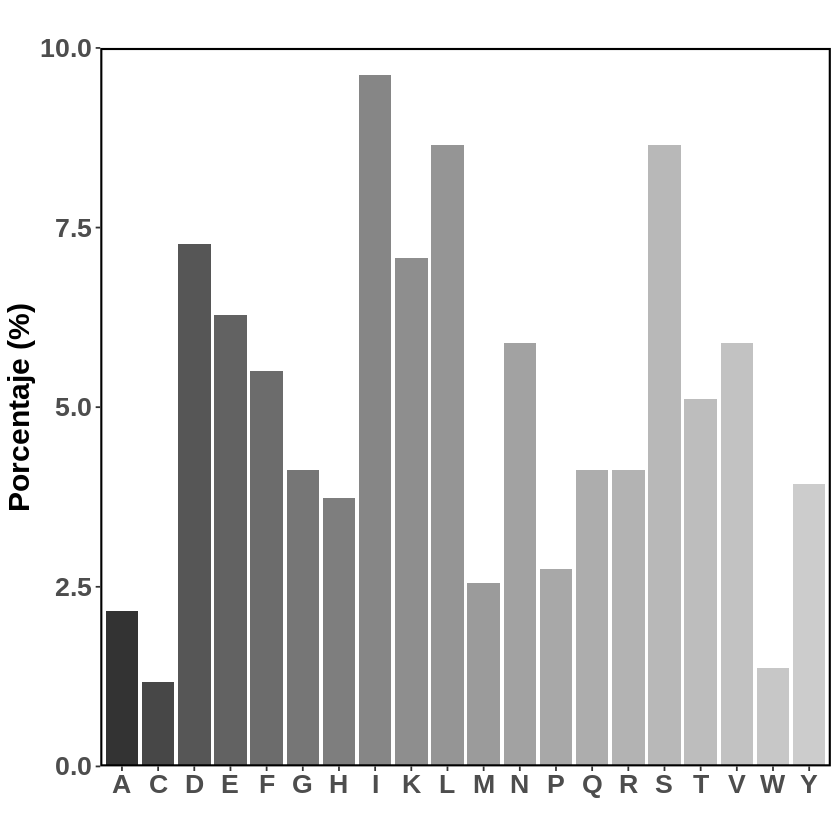

In [48]:
ggplot(residues_data, aes(x = Residue, y = Percentage, fill = Residue)) +
  geom_bar(stat = "identity") +
  scale_fill_grey() +
  theme_minimal() +
  labs(title = "", x = "Residuo", y = "Porcentaje (%)") +
  theme(text = element_text(size = 16)) +
  theme_test() +
  scale_y_continuous(expand=c(0,0)) +
  expand_limits(y=c(0,10))+
  theme(legend.position = "none", text=element_text(size=17, face = "bold", colour = "black"))+
  labs(x="", y="Porcentaje (%)") +
  theme(
    panel.border = element_rect(color = "black", linewidth = 1.2),
    axis.title = element_text(size = 18),
    axis.text = element_text(size = 16)
  )


#Comparación del LDDT (Local Distance Difference Test) para cada modelo

Primero descargamos y subimos la data, para leerla en formato txt, gracias a la función read.delim.

In [12]:
model1 <- read.delim("/content/modelo1.txt")
model2 <- read.delim("/content/modelo2.txt")
model3 <- read.delim("/content/modelo3.txt")
head(model1)
head(model2)
head(model3)

,residue.index,predicted.LDDT
,<int>,<dbl>
1,1,0.41
2,2,0.40
3,3,0.42
4,4,0.42
5,5,0.43
6,6,0.44


,residue.index,predicted.LDDT
,<int>,<dbl>
1,1,0.49
2,2,0.49
3,3,0.45
4,4,0.48
5,5,0.53
6,6,0.58


,residue,predicted
,<int>,<dbl>
1,1,0.29
2,2,0.27
3,3,0.25
4,4,0.26
5,5,0.27
6,6,0.29


Luego, combinamos las columnas necesarias para la gráfica requerida

In [13]:
combined_data <- data.frame(
  Residues = model1$residue.index,
  Predicted_LDDT_Model1 = model1$predicted.LDDT,
  Predicted_LDDT_Model2 = model2$predicted.LDDT,
  Predicted_LDDT_Model3 = model3$predicted)

con la función ggplot realizamos le agráfica

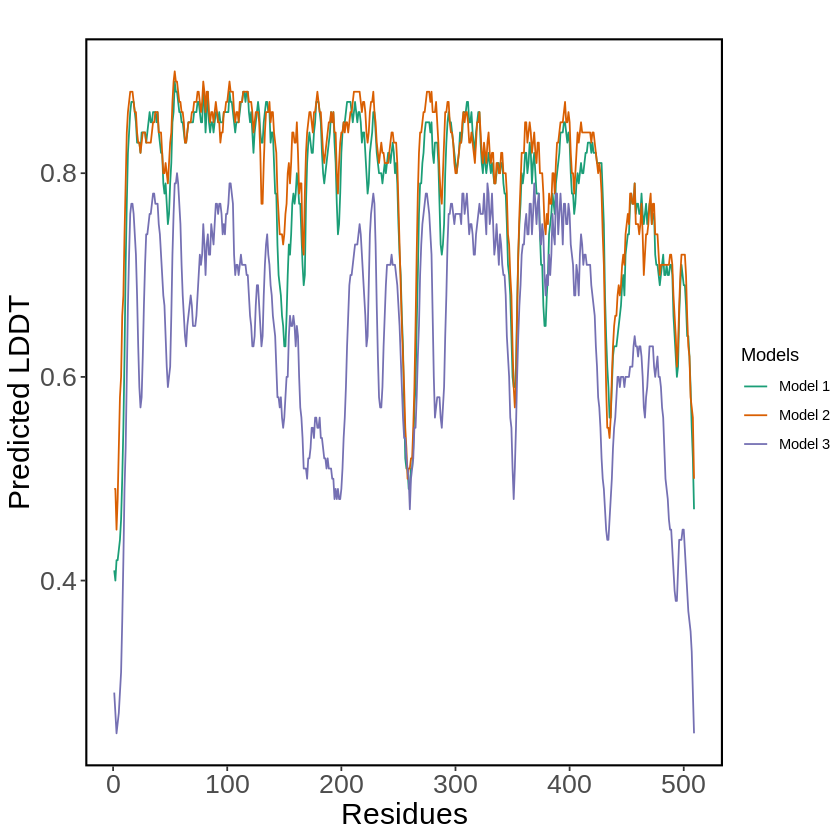

In [35]:
library(ggplot2)

ggplot(combined_data, aes(x = Residues)) +
  geom_line(aes(y = Predicted_LDDT_Model1, color = "Model 1")) +
  geom_line(aes(y = Predicted_LDDT_Model2, color = "Model 2")) +
  geom_line(aes(y = Predicted_LDDT_Model3, color = "Model 3")) +
  labs(title = "",
       x = "Residues",
       y = "Predicted LDDT") +
  scale_color_manual(name = "Models",
                     values = c("Model 1" = "#1b9e77",
                                "Model 2" = "#d95f02",
                                "Model 3" = "#7570b3")) +
  theme_test() +
  theme(
    panel.border = element_rect(color = "black", linewidth = 1.2),
    axis.title = element_text(size = 18),
    axis.text = element_text(size = 16)
  )

#Hidrofobicidad de la estructura

Los datos de hidrofobicidad se descargados desde ProtScale para graficarlo

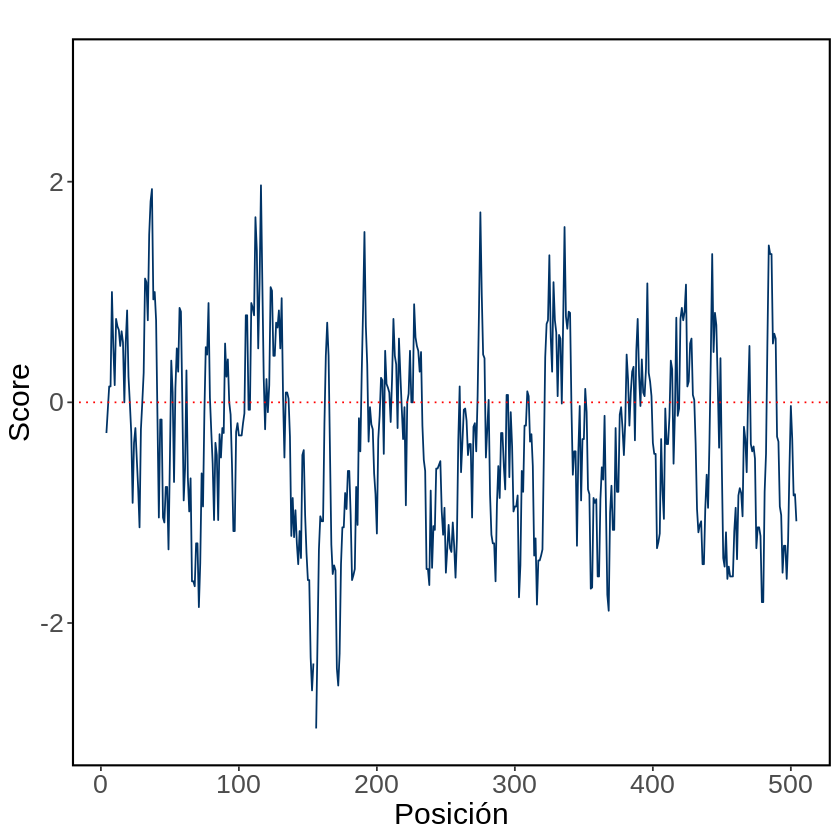

In [34]:
hdrp <- read.csv("/content/hidropaticidad.txt", sep="")

ggplot(hdrp, aes(x = residue, y = predicted)) +
  geom_line(color = "#003366") +
  geom_hline(yintercept = 0, linetype = "dotted", color = "red") +
  labs(title = "",
       x = "Posición",
       y = "Score") +
  scale_y_continuous(limits = c(-3, 3)) +
  theme_test() +
  theme(
    panel.border = element_rect(color = "black", linewidth = 1.2),
    axis.title = element_text(size = 18),
    axis.text = element_text(size = 16)
  )

#Arbol Filogenético

Por revisar la filogenia, (el gráfico en si)

In [ ]:
install.packages("ape")
library(ape)

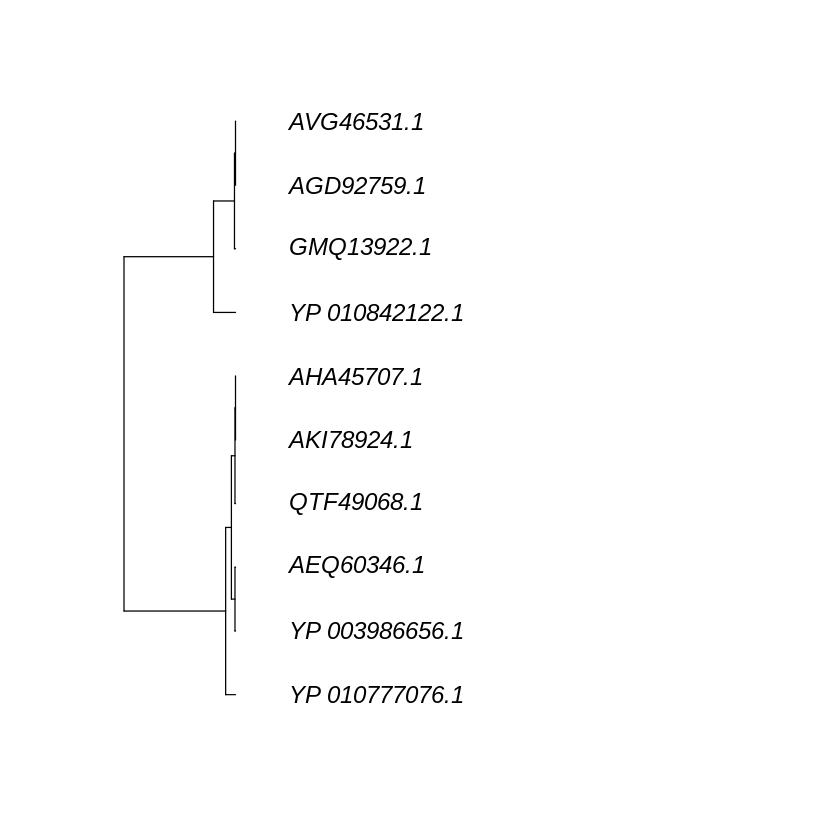

In [46]:
identity <- c(100.000, 99.804, 98.232, 98.428, 98.428, 95.285, 62.729, 54.747, 54.361, 54.361)
distance <- 1 - (identity / 100)
distance_matrix <- as.matrix(dist(distance))

sequence_names <- c("YP_003986656.1", "AEQ60346.1", "QTF49068.1", "AKI78924.1", "AHA45707.1", "YP_010777076.1", "YP_010842122.1", "GMQ13922.1", "AGD92759.1", "AVG46531.1")
rownames(distance_matrix) <- colnames(distance_matrix) <- sequence_names

distance_matrix <- as.dist(distance_matrix)
phylo_tree <- hclust(distance_matrix, method = "average")
phylo_tree_plot <- as.phylo(phylo_tree)

phylo_tree_plot$tip.label <- sequence_names

plot(phylo_tree_plot, main="", cex=1.2, label.offset=0.1, x.lim=c(0, 1.2))
